# Smart Flood Detector

In [1]:
import os
import shutil
import random
import itertools
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib as mpl
from keras import backend
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import decode_predictions, preprocess_input

In [2]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
labels = ['Flooding', 'No Flooding']
train_path = 'data/train'
valid_path = 'data/valid'
test_path = 'data/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 320 images belonging to 2 classes.
Found 81 images belonging to 2 classes.
Found 71 images belonging to 2 classes.


In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()
# mobile.summary()

In [4]:
x = mobile.layers[-6].output

In [5]:
output = Dense(units=2, activation='softmax')(x)

In [6]:
model = Model(inputs=mobile.input, outputs=output)

In [7]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [9]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history=model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10


c:\python38\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


32/32 - 26s - loss: 0.3625 - accuracy: 0.8469 - val_loss: 0.2583 - val_accuracy: 0.9136
Epoch 2/10
32/32 - 17s - loss: 0.1041 - accuracy: 0.9625 - val_loss: 0.2455 - val_accuracy: 0.9259
Epoch 3/10
32/32 - 15s - loss: 0.0287 - accuracy: 0.9969 - val_loss: 0.3579 - val_accuracy: 0.8642
Epoch 4/10
32/32 - 15s - loss: 0.0530 - accuracy: 0.9812 - val_loss: 0.1139 - val_accuracy: 0.9259
Epoch 5/10
32/32 - 15s - loss: 0.0197 - accuracy: 0.9969 - val_loss: 0.0500 - val_accuracy: 0.9877
Epoch 6/10
32/32 - 15s - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0436 - val_accuracy: 0.9753
Epoch 7/10
32/32 - 15s - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9753
Epoch 8/10
32/32 - 15s - loss: 0.0296 - accuracy: 0.9875 - val_loss: 0.1459 - val_accuracy: 0.9259
Epoch 9/10
32/32 - 15s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9753
Epoch 10/10
32/32 - 15s - loss: 0.0470 - accuracy: 0.9875 - val_loss: 0.0353 - val_accuracy: 0.9877


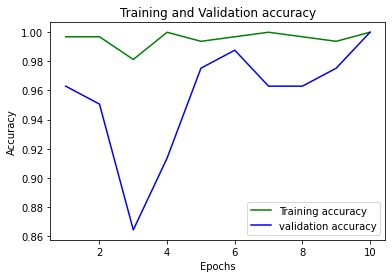

In [32]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

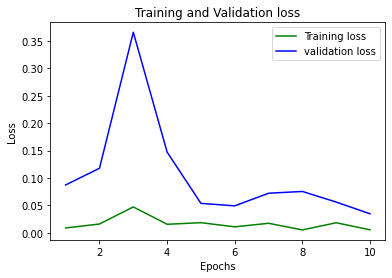

In [30]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
model.save("fine_tuned_flood_detection_model")

INFO:tensorflow:Assets written to: fine_tuned_flood_detection_model\assets


In [26]:
# test_labels = test_batches.classes
# predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
# cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
# precision = precision_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
# f1_score = f1_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
# accuracy = accuracy_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#             horizontalalignment="center",
#             color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

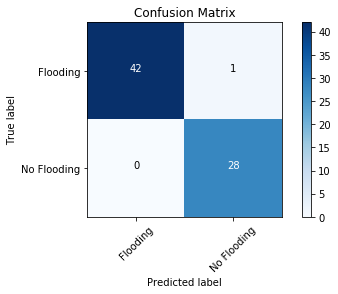

In [14]:
test_batches.class_indices
cm_plot_labels = ['Flooding','No Flooding']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [13]:
print('Precision: ', precision)
print('F1 Score: ', f1_score)
print('Accuracy: ', accuracy)

Precision:  0.9655172413793104
F1 Score:  0.9824561403508771
Accuracy:  0.9859154929577465


In [23]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Evaluate our finetuned model

In [11]:
def preprocess_image(file):
    img_path = 'evaluate/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

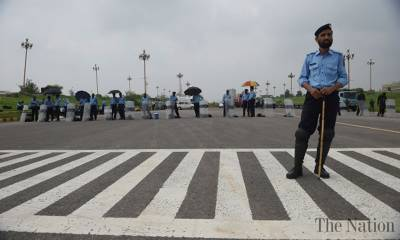

In [12]:
from IPython.display import Image
file_name='5.jpg'
file_path='evaluate/'+file_name
Image(filename=file_path, width=300,height=200) 

In [13]:
preprocessed_image = preprocess_image(file_name)
predictions = model.predict(preprocessed_image)

In [14]:
result = np.argmax(predictions)

In [15]:
labels[result]

'No Flooding'

In [16]:
print("Probability of flood:",str(predictions[0][0]*100)+"%")

Probability of flood: 0.3246694803237915%


In [17]:
print("Probability of Non-flood:",str(predictions[0][1]*100)+"%")

Probability of Non-flood: 99.67532753944397%


## Twitter Alert When Flooding Image Detected

In [18]:
# importing the module
import tweepy
  
# personal details
consumer_key ="CVvVnd60bi8qtF07bPCJ7ci3V"
consumer_secret ="3pbWzBSh1nLn3sEuMmmlGBdK7rTiWD9J5CqXsSbwCPVGgYiyo1"
access_token ="1107236292167766019-42AEazOu8oEtoDeEo43TR5v3Hp3A9S"
access_token_secret ="cXtwnk2QnCMM9Zmbw38XTpubDFtbTnh0frR1vvKFcXPuY"
  
# authentication of consumer key and secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
  
# authentication of access token and secret
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

my_tweet ="Flood Detected!!!!"+"\n"+"Please get help in this area." 
my_image_path =file_path
# update the status
if labels[result]=="Flooding":
    my_status = api.update_with_media(my_image_path, my_tweet) 
#     api.update_status(status ="Need Care")
    print("Tweet Posted")
elif labels[result]=="No Flooding":
    print("No Tweet Posted")
# api.update_status(status ="Hello !")


No Tweet Posted
